### 모터스 고객등급제 개편을 위한 분석 - 4. Final 
--- 
  1) K-means 결과로 4개 군집으로 구분된 데이터 로딩 
  2) 4개 군집별로 특성 비교   
--- 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings 
warnings.filterwarnings('ignore')
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rc('axes',unicode_minus=False)

In [2]:
## 1. Dataset loading 
df = pd.read_csv('data/output.csv', encoding = 'euc-kr')
print( df.shape )
print( df.columns )
df.head(2)

(8230, 26)
Index(['customer_name', 'hp', 'customer_type', 'gender', 'birth_day',
       'age_on_2023', 'show_room', 'series', 'model', 'model_category',
       'nc_sales', 'service_sales', 'tot_sales', '2023_sf_end', 'sf_due_date',
       'sf_real_end_date', 'sf_early_end_months', 'sf_early_end_yn',
       'nc_purchase_count', 'service_count', 'nps_score', 'nps_category',
       'log_nc_sales', 'log_service_sales', 'log_tot_sales', 'cluster_label'],
      dtype='object')


,customer_name,hp,customer_type,gender,birth_day,age_on_2023,show_room,series,model,model_category,...,sf_early_end_months,sf_early_end_yn,nc_purchase_count,service_count,nps_score,nps_category,log_nc_sales,log_service_sales,log_tot_sales,cluster_label
0,원종영,010-8837-4492,개인,male,1976-12-22,48.0,천안,5SERIES,520d xDrive,520d,...,NaN,NaN,1,0,9.0,3.promoter,17.883261,0.000000,17.883261,0
1,김수미,010-9063-7762,개인,female,1993-09-20,31.0,천안,3SERIES,3GT 20d xDrive LCI,3GT,...,NaN,NaN,1,1,10.0,3.promoter,17.580255,12.868132,17.582050,3


0    3200
3    2929
2    1086
1    1015
Name: cluster_label, dtype: int64


<AxesSubplot:xlabel='cluster_label', ylabel='count'>

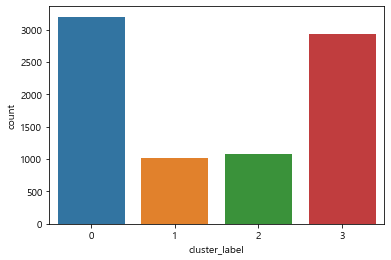

In [3]:
## 클러스터별 인원수 
c_count = df['cluster_label'].value_counts()
print(c_count) 

sns.countplot(data=df, x= 'cluster_label')

In [4]:
## 2. 군집별 비교 - 성별 구성비 
df.groupby(['cluster_label', 'gender'])['hp'].count()

cluster_label  gender
0              female     877
               male      2252
1              female     174
               male       810
2              female     242
               male       820
3              female     691
               male      2148
Name: hp, dtype: int64

--- 
- C0 남:여 = 2149:687 = 72 : 28 % 
- C1 남:여 = 2254:877 = 82 : 18 %
- C2 남:여 =  818:242 = 77 : 23 % 
- C3 남:여 =  809:176 = 76 : 24 %

#### --> 전반적으로 남성 비율이 70% 이상, 특히 C1에서 82%로 가장 높음 
--- 

cluster_label
0    43.366250
1    45.753695
2    45.698895
3    43.491977
Name: age_on_2023, dtype: float64


<AxesSubplot:xlabel='cluster_label', ylabel='age_on_2023'>

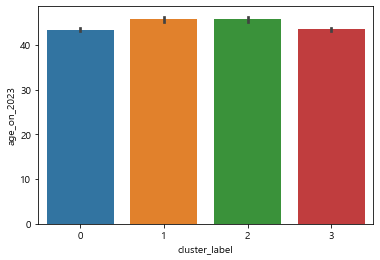

In [5]:
## 3. 군집별 비교 - 평균연령 
a = df.groupby(['cluster_label'])['age_on_2023'].mean()
print(a)
sns.barplot(data=df, x='cluster_label', y='age_on_2023')

[Text(0.5, 1.0, '연령대 - C3')]

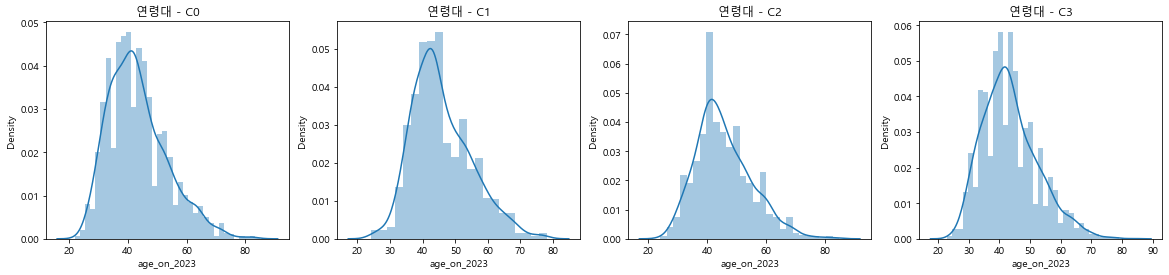

In [6]:
df_c0 = df[df['cluster_label'] == 0] 
df_c1 = df[df['cluster_label'] == 1] 
df_c2 = df[df['cluster_label'] == 2] 
df_c3 = df[df['cluster_label'] == 3] 

figure, (ax1,ax2,ax3,ax4) = plt.subplots(ncols=4)
figure.set_size_inches(20,4)
sns.distplot(df_c0['age_on_2023'], ax=ax1)
sns.distplot(df_c1['age_on_2023'], ax=ax2)
sns.distplot(df_c2['age_on_2023'], ax=ax3)
sns.distplot(df_c3['age_on_2023'], ax=ax4)

ax1.set(title = '연령대 - C0')
ax2.set(title = '연령대 - C1')
ax3.set(title = '연령대 - C2')
ax4.set(title = '연령대 - C3')

---
- C0 & C3 그룹의 평균연령 43세, C1 & 2 그룹은 45세 
- 네 그룹 모두 분포 상에서 특이점은 보이지 않음 
---

[Text(0.5, 1.0, '시리즈 - C3')]

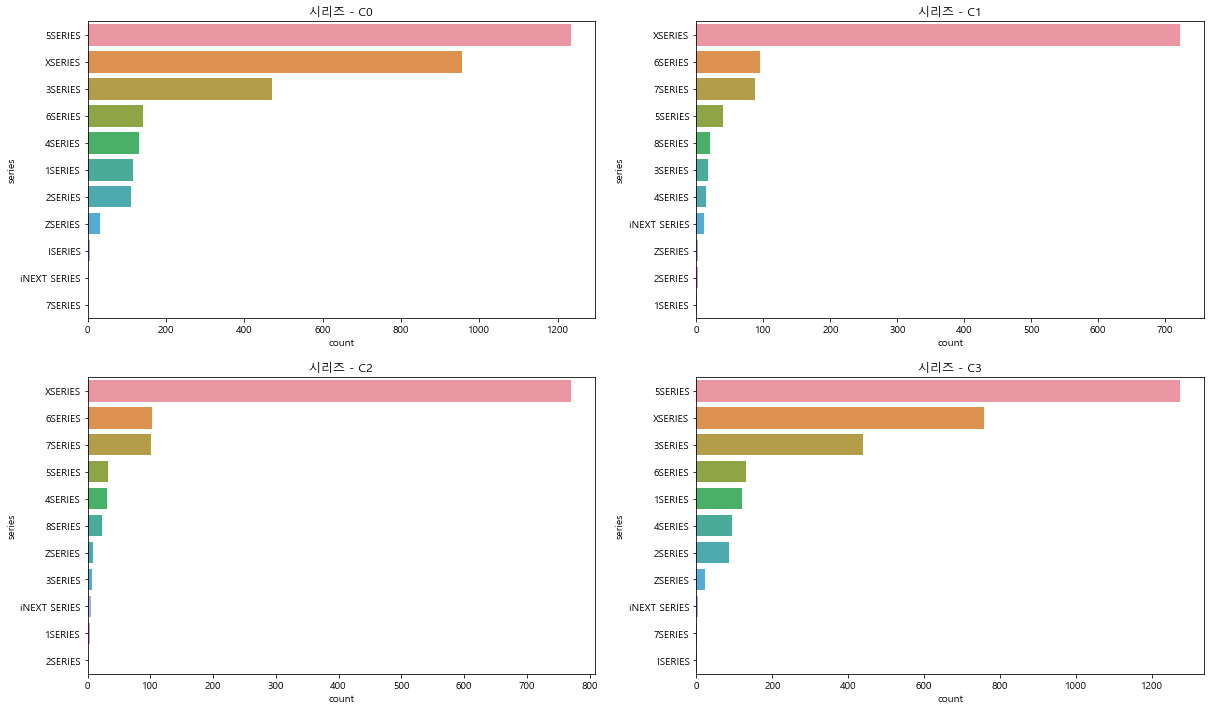

In [7]:
## 4. 군집별 비교 - 시리즈 
'''
series_count_c0 = df_c0['series'].value_counts()
series_count_c1 = df_c1['series'].value_counts()
series_count_c2 = df_c2['series'].value_counts()
series_count_c3 = df_c3['series'].value_counts()
'''

figure, ((ax1,ax2),(ax3,ax4)) = plt.subplots(nrows=2, ncols=2)
figure.set_size_inches(20,12)
sns.countplot(data=df_c0, y= 'series', order = df_c0['series'].value_counts().index, ax=ax1)
sns.countplot(data=df_c1, y= 'series', order = df_c1['series'].value_counts().index, ax=ax2)
sns.countplot(data=df_c2, y= 'series', order = df_c2['series'].value_counts().index, ax=ax3)
sns.countplot(data=df_c3, y= 'series', order = df_c3['series'].value_counts().index, ax=ax4)

ax1.set(title = '시리즈 - C0')
ax2.set(title = '시리즈 - C1')
ax3.set(title = '시리즈 - C2')
ax4.set(title = '시리즈 - C3')

[Text(0.5, 1.0, '모델 - C1')]

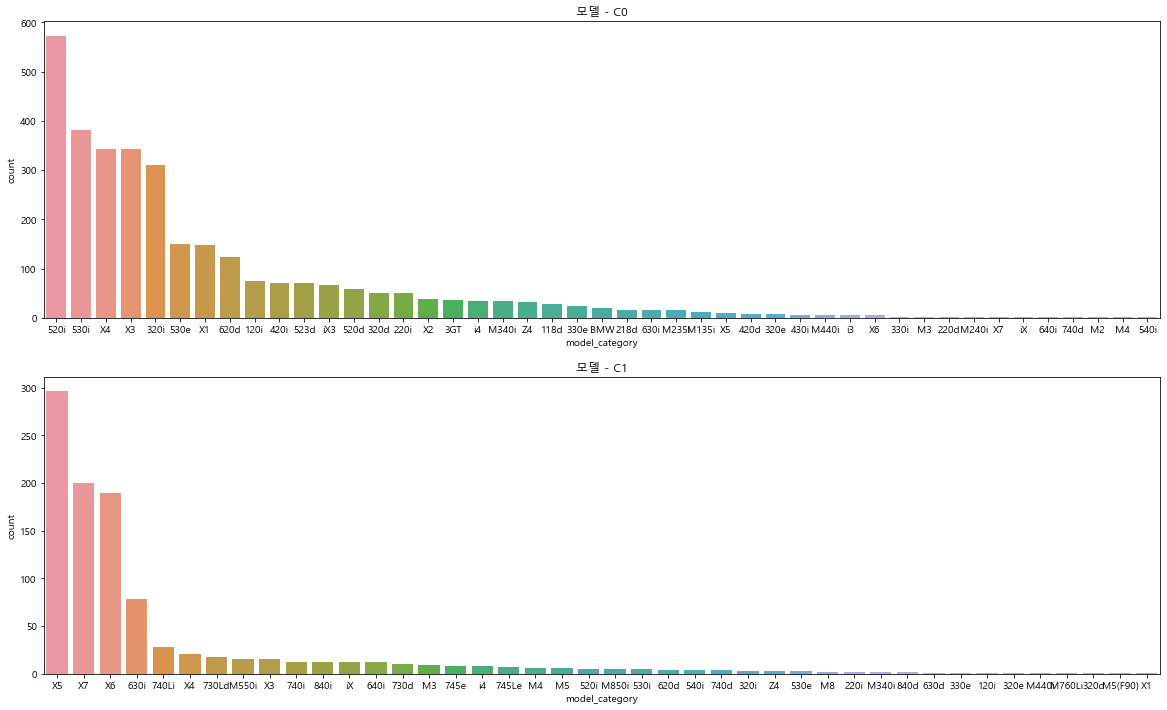

In [8]:
## 참고. C0&C1의 구매모델 비교 
figure, (ax1,ax2) = plt.subplots(nrows=2)
figure.set_size_inches(20,12)
sns.countplot(data=df_c0, x= 'model_category', order = df_c0['model_category'].value_counts().index, ax=ax1)
sns.countplot(data=df_c1, x= 'model_category', order = df_c1['model_category'].value_counts().index, ax=ax2)

ax1.set(title = '모델 - C0')
ax2.set(title = '모델 - C1')

[Text(0.5, 1.0, '모델 - C3')]

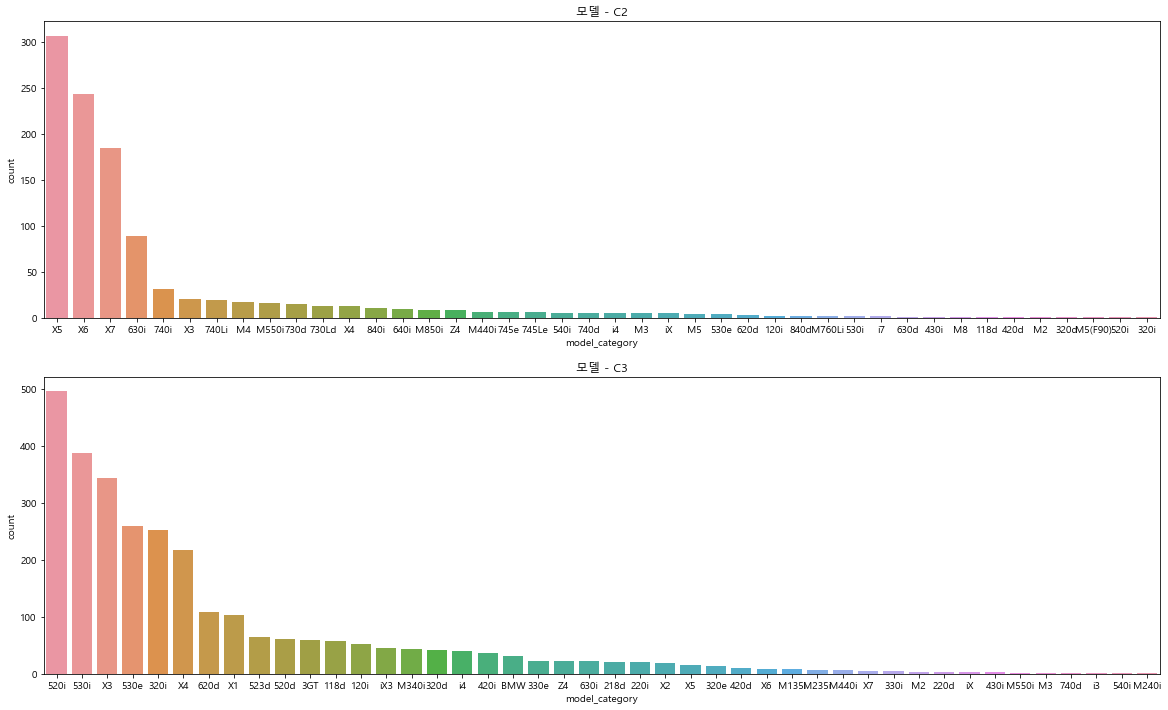

In [9]:
## 참고. C2&C3의 구매모델 비교 
figure, (ax1,ax2) = plt.subplots(nrows=2)
figure.set_size_inches(20,12)
sns.countplot(data=df_c2, x= 'model_category', order = df_c2['model_category'].value_counts().index, ax=ax1)
sns.countplot(data=df_c3, x= 'model_category', order = df_c3['model_category'].value_counts().index, ax=ax2)

ax1.set(title = '모델 - C2')
ax2.set(title = '모델 - C3')

- C0 & C1은 주로 5시리즈를, C2 & C3는 주로 SUV 모델 (X5,6,7)을 구매하였음 
--- 

C0의 평균매출금액 55855765.3
C1의 평균매출금액 104929571.5
C2의 평균매출금액 103530179.7
C3의 평균매출금액 56112792.5


[Text(0.5, 1.0, 'Tot. sales - C3')]

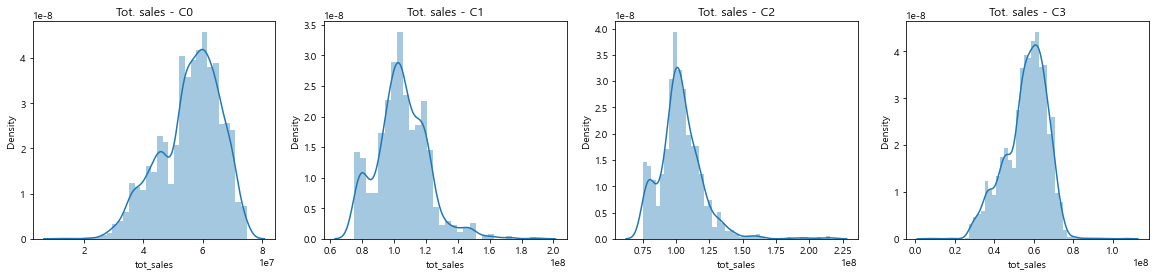

In [10]:
## 5. 군집별 비교 - Total Sales
print('C0의 평균매출금액', round(df_c0['tot_sales'].mean(),1))
print('C1의 평균매출금액', round(df_c1['tot_sales'].mean(),1))
print('C2의 평균매출금액', round(df_c2['tot_sales'].mean(),1))
print('C3의 평균매출금액', round(df_c3['tot_sales'].mean(),1))

figure, (ax1,ax2,ax3,ax4) = plt.subplots(ncols=4)
figure.set_size_inches(20,4)
sns.distplot(df_c0['tot_sales'], ax=ax1)
sns.distplot(df_c1['tot_sales'], ax=ax2)
sns.distplot(df_c2['tot_sales'], ax=ax3)
sns.distplot(df_c3['tot_sales'], ax=ax4)
ax1.set(title = 'Tot. sales - C0')
ax2.set(title = 'Tot. sales - C1')
ax3.set(title = 'Tot. sales - C2')
ax4.set(title = 'Tot. sales - C3')

- 평균 매출은 C0 & C3 = 약 56백만원, C1 & C2 = 약 1.1억원 수준
---

C0의 평균 AS매출금액 1.2
C1의 평균 AS매출금액 979398.9
C2의 평균 AS매출금액 0.0
C3의 평균 AS매출금액 1142093.2


[Text(0.5, 1.0, 'AS sales - C3')]

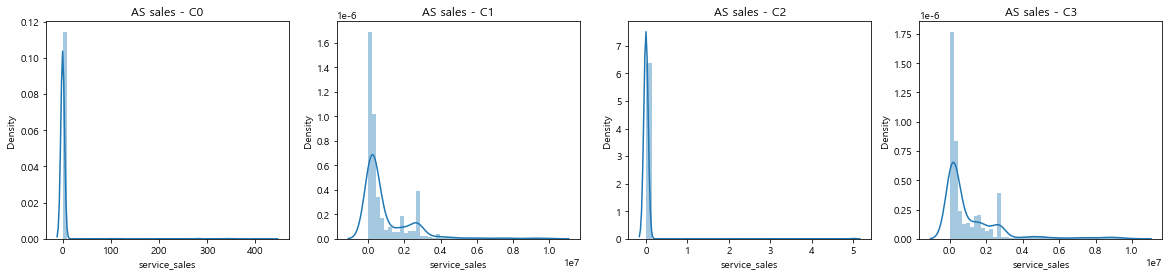

In [11]:
## 6-1. 군집별 비교 - AS Sales
print('C0의 평균 AS매출금액', round(df_c0['service_sales'].mean(),1))
print('C1의 평균 AS매출금액', round(df_c1['service_sales'].mean(),1))
print('C2의 평균 AS매출금액', round(df_c2['service_sales'].mean(),1))
print('C3의 평균 AS매출금액', round(df_c3['service_sales'].mean(),1))

figure, (ax1,ax2,ax3,ax4) = plt.subplots(ncols=4)
figure.set_size_inches(20,4)
sns.distplot(df_c0['service_sales'], ax=ax1)
sns.distplot(df_c1['service_sales'], ax=ax2)
sns.distplot(df_c2['service_sales'], ax=ax3)
sns.distplot(df_c3['service_sales'], ax=ax4)
ax1.set(title = 'AS sales - C0')
ax2.set(title = 'AS sales - C1')
ax3.set(title = 'AS sales - C2')
ax4.set(title = 'AS sales - C3')

C0의 AS횟수 0.0
C1의 AS횟수 1.2
C2의 AS횟수 0.0
C3의 AS횟수 1.2


[Text(0.5, 1.0, 'AS 횟수 - C3')]

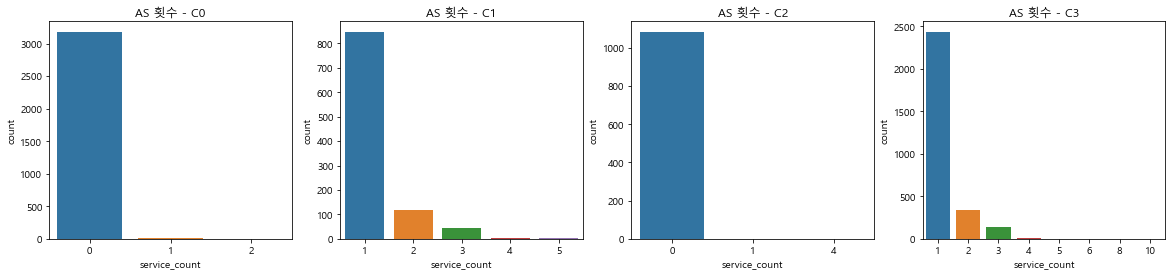

In [12]:
## 6-2. 군집별 비교 - AS count
print('C0의 AS횟수', round(df_c0['service_count'].mean(),1))
print('C1의 AS횟수', round(df_c1['service_count'].mean(),1))
print('C2의 AS횟수', round(df_c2['service_count'].mean(),1))
print('C3의 AS횟수', round(df_c3['service_count'].mean(),1))

figure, (ax1,ax2,ax3,ax4) = plt.subplots(ncols=4)
figure.set_size_inches(20,4)
sns.countplot(df_c0['service_count'], ax=ax1)
sns.countplot(df_c1['service_count'], ax=ax2)
sns.countplot(df_c2['service_count'], ax=ax3)
sns.countplot(df_c3['service_count'], ax=ax4)
ax1.set(title = 'AS 횟수 - C0')
ax2.set(title = 'AS 횟수 - C1')
ax3.set(title = 'AS 횟수 - C2')
ax4.set(title = 'AS 횟수 - C3')

- 매출과 더불어 AS경험에서 집단간 차이가 확연히 드러남 
- C1와 C3 군은 1~3번 정도 AS를 경험한데 비해, C0와 C2 군은 AS 경험이 없음 
---

C0의 NPS 9.7
C1의 NPS 9.7
C2의 NPS 9.7
C3의 NPS 9.6


[Text(0.5, 1.0, 'NPS score - C3')]

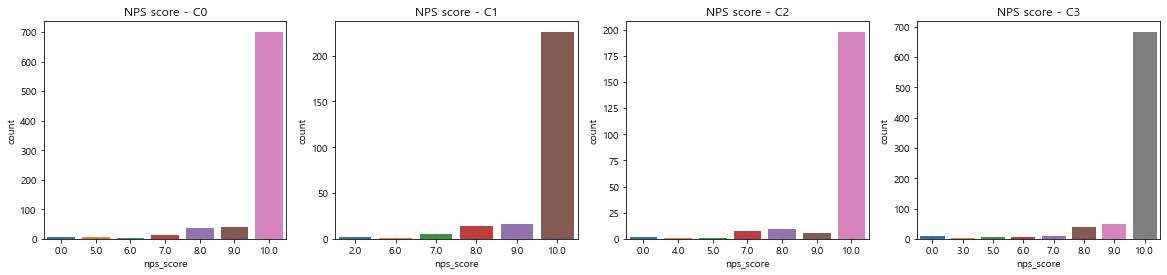

In [13]:
## 7. 군집별 비교 - NPS
print('C0의 NPS', round(df_c0['nps_score'].mean(),1))
print('C1의 NPS', round(df_c1['nps_score'].mean(),1))
print('C2의 NPS', round(df_c2['nps_score'].mean(),1))
print('C3의 NPS', round(df_c3['nps_score'].mean(),1))

figure, (ax1,ax2,ax3,ax4) = plt.subplots(ncols=4)
figure.set_size_inches(20,4)
sns.countplot(df_c0['nps_score'], ax=ax1)
sns.countplot(df_c1['nps_score'], ax=ax2)
sns.countplot(df_c2['nps_score'], ax=ax3)
sns.countplot(df_c3['nps_score'], ax=ax4)
ax1.set(title = 'NPS score - C0')
ax2.set(title = 'NPS score - C1')
ax3.set(title = 'NPS score - C2')
ax4.set(title = 'NPS score - C3')

- 대부분 10점으로 유의미한 차이를 보기 어려움 
--- 

### [데이터 리뷰결과 정리] 

1. 신차와 AS 매출데이터만으로 클러스터링을 시도한 결과, 4개의 그룹으로 구분이 가능하였다. 

2. 신차 매출은 평균 56백만원인 집단과 평균 1.1억인 집단으로 구분 가능했는데, 고객의 구입 차종(세단/SUV)에 따라 나뉘었다. 
   - 매출금액 또는 시리즈가 고객등급 구분의 중요한 지표로써 타당함을 확인할 수 있었다.  


3. AS 매출은 당사에 입고를 한 고객과 그렇지 않은 고객으로 구분되었다. 
   - 타 딜러사에서 AS 받았을 가능성이 있어, 고객성향(차량관리 중시 등)을 판단하기는 어려우나 
   - 당사에서 AS를 받은 고객의 경우 그렇지 않은 고객에 비해 보다 로열티가 있다고 간주할 수 있다. 


4. 결론적으로 보정된 누적 매출금액을 기준으로 고객등급을 구분하려는 현업의 의도는 타당하다고 판단됨. 


5. 분석과정에서 가용한 데이터가 매출 뿐이라는 부분에서 한계를 느꼈음. 
   - 고객의 성향, 속성 등 매출과 다른 특성을 가진 데이터가 추가된다면, 또 다른 군집을 발견하는 등 보다 풍부한 결과를 얻을 수 있을 것으로 기대됨 
   

![summary?](data/summary.png)   

(이상)

<AxesSubplot:xlabel='log_nc_sales', ylabel='log_service_sales'>

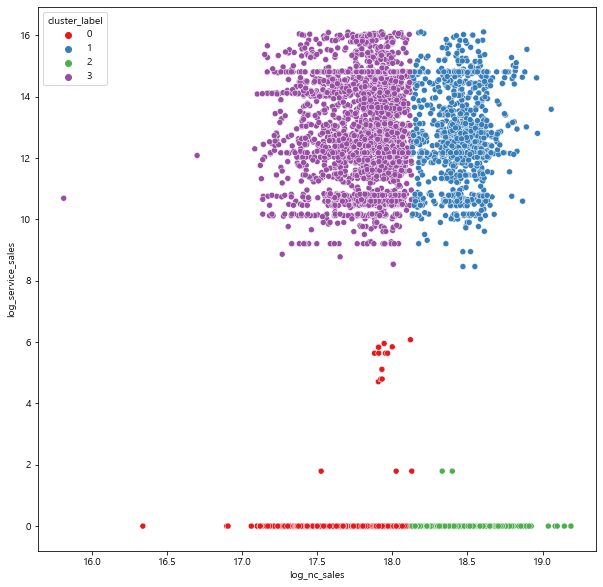

In [14]:
plt.figure(figsize = (10,10))
#sns.scatterplot(data=df, x='nc_sales', y='service_sales', hue='cluster_label', palette="Set1")
sns.scatterplot(data=df, x='log_nc_sales', y='log_service_sales', hue='cluster_label', palette="Set1")

In [15]:
## 